<a href="https://colab.research.google.com/github/adammoss/astro_datasets/blob/main/examples/slc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.12-py3-none-any.whl size=17618 sha256=a5815d0859a106dcf536ea119d273ec342c245b7345e063f3d8227328be574d3
  Stored in directory: /root/.cache/pip/wheels/d9/03/ec/29fa20c1282412846c24132dc65566a32f0e6a8d43e26cc589
Successfully built astro-datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow_datasets as tfds
import astro_datasets

In [6]:
ds_train, info_train = tfds.load(name='slc/space', split='train', with_info=True, as_supervised=True)
ds_test, info_test = tfds.load(name='slc/space', split='test', with_info=True, as_supervised=True)

In [7]:
print(info_train)

tfds.core.DatasetInfo(
    name='slc',
    full_name='slc/space/1.0.0',
    description="""
    The strong lensing challenge dataset consists of 101x101 images in 2 classes. There are 20000 training images and 20000 test images.
    """,
    homepage='http://metcalf1.difa.unibo.it/blf-portal/gg_challenge.html',
    data_path='~/tensorflow_datasets/slc/space/1.0.0',
    file_format=tfrecord,
    download_size=1.41 GiB,
    dataset_size=1.52 GiB,
    features=FeaturesDict({
        'image': Tensor(shape=(101, 101, 1), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=20000, num_shards=8>,
        'train': <SplitInfo num_examples=20000, num_shards=8>,
    },
    citation="""""",
)


In [8]:
def normalize(image, label):  
  image = (image - 4.3368458e-13) / 5.503901e-12
  return image, label

In [9]:
ds_train = ds_train.map(normalize)
ds_test = ds_test.map(normalize)

In [10]:
x = np.stack([x for x, y in ds_train])
print(len(x), np.mean(x), np.std(x))

20000 -1.2008836e-07 1.0000012


In [11]:
x = np.stack([x for x, y in ds_test])
print(len(x), np.mean(x), np.std(x))

20000 -0.019080857 0.92817616


tf.Tensor(1, shape=(), dtype=int64)


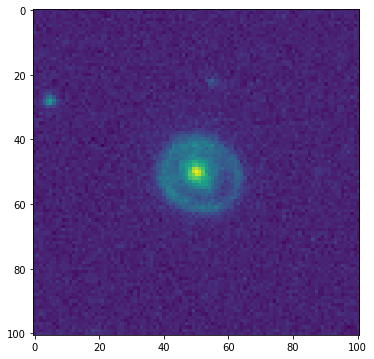

tf.Tensor(1, shape=(), dtype=int64)


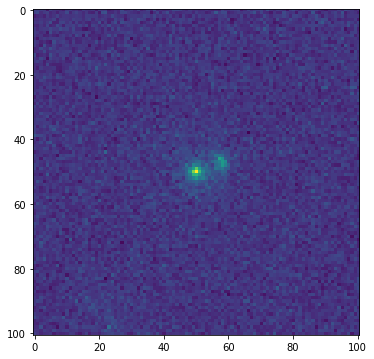

In [12]:
for d in ds_train.take(2):
    inputs, label = d
    print(label)
    plt.figure(figsize=(6, 6))
    plt.imshow(inputs[:,:,0])
    plt.show()